# 查看、准备数据

In [1]:
import pandas as pd
import numpy as np
from PIL import Image

MasterFile = pd.read_csv("/clubear/Lecture 2.1 - Linear Regression by TensorFlow/data/faces/FaceScore.csv")

In [2]:
MasterFile[0:5] #查看data

,Filename,Rating
0,ftw1.jpg,4.083333
1,ftw10.jpg,3.666667
2,ftw100.jpg,1.916667
3,ftw101.jpg,2.416667
4,ftw102.jpg,3.166667


# 准备数据，将其转化为非线性回归问题

In [50]:
FileNames=MasterFile['Filename'] 
N=len(FileNames)
IMSIZE=128
X=np.zeros([N,IMSIZE,IMSIZE,3])
for i in range(N):
    MyFile=FileNames[i]
    Im=Image.open('/clubear/Lecture 2.1 - Linear Regression by TensorFlow/data/faces/images/'+MyFile)
    Im=Im.resize([IMSIZE,IMSIZE])
    Im=np.array(Im)/255
    X[i,]=Im

#创建一个X画布，将图片以array的形式一个个粘贴到X上

In [35]:
list_y = [] #创建一个空的list
for i in range(N):
    MyFile = FileNames[i] #提取Filenames
    if MyFile[0] == "f": 
         list_y.append(0)
    elif MyFile[0] == "m":
         list_y.append(1)
#如果filename 第一个字母是f，添加0在list里；反之则添加1 （用0和1表示性别）
Y = np.asarray(list_y)
Y



array([0, 0, 0, ..., 1, 1, 1])

  # 数据切分

In [55]:
from sklearn.model_selection import train_test_split
X0,X1,Y0,Y1=train_test_split(X,Y,test_size=0.3,random_state=233) #固定seed为233，train：test = 7:3

# 数据展示

<Figure size 432x288 with 0 Axes>

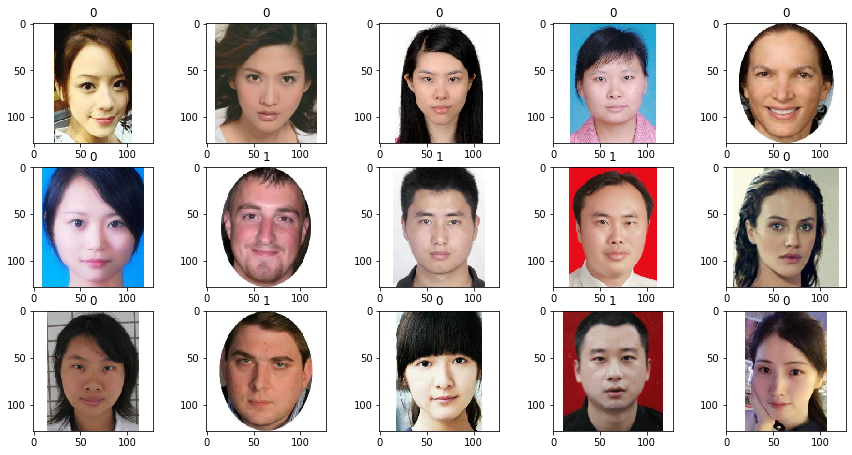

In [58]:
from matplotlib import pyplot as plt
plt.figure()
fig,ax=plt.subplots(3,5)
fig.set_figheight(7.5)
fig.set_figwidth(15)
ax=ax.flatten()
for i in range(15):
    ax[i].imshow(X0[i,:,:,:])
    ax[i].set_title(Y0[i])
#查看数据是否consistent ie 0和1的添加是否对应

# 产生One-Hot型因变量

In [62]:
from keras.utils import to_categorical
YY0 = to_categorical(Y0)
YY1 = to_categorical(Y1)
YY1

#因为TensorFlow只能阅读One-Hot的变量，将0和1变成[1，0]和[0，1]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

# 逻辑回归模型搭建

In [64]:
from keras.layers import  Dense, Flatten, Input, Activation
from keras import Model


input_layer = Input([IMSIZE,IMSIZE,3])
x= input_layer
x = Flatten()(x)
X = Dense(7)(x) #自己设定的一个全连接层，想要模拟五官（5）+ 头发长度+ 脸型 7个判定性别的要素
x = Dense(2)(x) #ouput为2的全连接层，最后只允许给出0或1 
x = Activation("softmax")(x)
output_layer = x
model = Model(input_layer, output_layer)

In [65]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 98306     
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 98,306
Trainable params: 98,306
Non-trainable params: 0
_________________________________________________________________


只有Dense_2有参数，（128*128*3 =）49152 * 2 （因为每一个Flatten中的nodes都和Dense_2的两个nodes有连接）= 98304 + 2个截距项 共98306个参数。 

In [67]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(0.05),
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])


In [90]:
model.fit(X0,YY0, validation_data = (X1,YY1),
         batch_size = 200, 
          epochs = 20)
 #因为有3850个sample在train data里，batch_size不宜很多
#尝试了epochs = 10，发现accuracy还有向上升的空间，于是将epochs定为20

Train on 3850 samples, validate on 1650 samples
Epoch 1/20
3850/3850 [==============================] - 2s 400us/step - loss: 11.2074 - accuracy: 0.8101 - val_loss: 16.2442 - val_accuracy: 0.7582
Epoch 2/20
3850/3850 [==============================] - 2s 410us/step - loss: 16.3872 - accuracy: 0.7803 - val_loss: 33.4855 - val_accuracy: 0.6685
Epoch 3/20
3850/3850 [==============================] - 2s 408us/step - loss: 19.4982 - accuracy: 0.7670 - val_loss: 13.9466 - val_accuracy: 0.8248
Epoch 4/20
3850/3850 [==============================] - 2s 409us/step - loss: 10.4418 - accuracy: 0.8343 - val_loss: 6.3400 - val_accuracy: 0.8655
Epoch 5/20
3850/3850 [==============================] - 2s 401us/step - loss: 30.6433 - accuracy: 0.7081 - val_loss: 40.9868 - val_accuracy: 0.6709
Epoch 6/20
3850/3850 [==============================] - 2s 409us/step - loss: 28.1004 - accuracy: 0.7634 - val_loss: 36.3656 - val_accuracy: 0.7061
Epoch 7/20
3850/3850 [==============================] - 2s 411us/

In [91]:
#读取我的图像
img1 = Image.open("f1.JPG")
img2 = Image.open("m1.JPG")
img3 = Image.open("f2.jpg")
img4 = Image.open("m2.jpg")

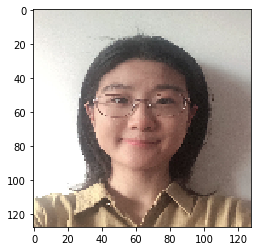

In [92]:
MyPic1=img1.resize((IMSIZE,IMSIZE)) 
plt.imshow(MyPic1)
MyPic1=np.array(MyPic1)/255 
MyPic1=MyPic1.reshape((1,IMSIZE,IMSIZE,3)) 


In [93]:
model.predict(MyPic1)

array([[1.000000e+00, 6.960511e-14]], dtype=float32)

可以看到predict的值是【1，0】，代表女性，正确

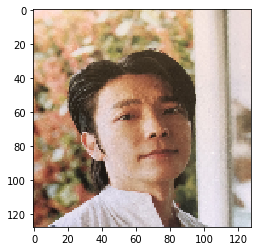

In [94]:
MyPic4=img4.resize((IMSIZE,IMSIZE)) 
plt.imshow(MyPic4)
MyPic4=np.array(MyPic4)/255 
MyPic4=MyPic4.reshape((1,IMSIZE,IMSIZE,3)) 

In [95]:
model.predict(MyPic4)

array([[1., 0.]], dtype=float32)

此判断错误